In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe
from matplotlib.ticker import FormatStrFormatter

import corner

import result_utils

In [2]:
name_A = 'Luhman 16A'; name_B = 'Luhman 16B'
color_A = '#FF622E'; color_B = '#396ED8'

cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_A])
env_colors_A = cmap([0,1/4,2/4,3/4,1])
env_colors_A[:,3] = 0.5; env_colors_A[0,3] = 0.0

cmap = mpl.colors.LinearSegmentedColormap.from_list('', ['w',color_B])
env_colors_B = cmap([0,1/4,2/4,3/4,1])
env_colors_B[:,3] = 0.5; env_colors_B[0,3] = 0.0

lw_d = 0.8
lw_m = 1.0

res_alpha = 0.85

path = '/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs'
A = result_utils.RetrievalResults(f'{path}/freechem_K_A_ret_5/test_')
B = result_utils.RetrievalResults(f'{path}/freechem_K_B_ret_6/test_')
A_eq = result_utils.RetrievalResults(f'{path}/freechem_K_A_ret_5/test_')
B_eq = result_utils.RetrievalResults(f'{path}/eqchem_K_B_ret_2/test_')

/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_5/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_5/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_B_ret_6/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_B_ret_6/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_5/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/freechem_K_A_ret_5/test_.txt
/net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/eqchem_K_B_ret_2/test_data
  analysing data from /net/schenk/data2/regt/data_backup/Luhman_16/retrieval_outputs/eqchem_K_B_ret_2/test_.txt


In [ ]:
def get_chemical_ratios(Res, mean_along_axis=None):
    
    # Load the chemistry module
    Res.load_components(['Chem'])

    m_set = Res.model_settings[0]
    VMRs = Res.Chem[m_set].VMRs_posterior

    chem_ratios = {}
    chem_ratios['C/O'] = (
        (VMRs.get('12CO',0.)+VMRs.get('CH4',0.)+VMRs.get('13CO',0.)) / 
        (VMRs.get('12CO',0.)+VMRs.get('13CO',0.)+VMRs.get('H2O',0.))
    )

    # Isotope ratios
    chem_ratios['12CO/13CO'] = VMRs.get('12CO',0.) / VMRs.get('13CO',0.)
    chem_ratios['C16O/C18O'] = VMRs.get('12CO',0.) / VMRs.get('C18O',0.)
    chem_ratios['C16O/C17O'] = VMRs.get('12CO',0.) / VMRs.get('C17O',0.)
    
    chem_ratios['H2O/HDO'] = VMRs.get('H2O',0.) / VMRs.get('HDO',0.)
    chem_ratios['H2(16)O/H2(18)O'] = VMRs.get('H2O',0.) / VMRs.get('H2(18)O',0.)
    chem_ratios['H2(16)O/H2(17)O'] = VMRs.get('H2O',0.) / VMRs.get('H2(17)O',0.)

    chem_ratios['12CH4/13CH4'] = VMRs.get('CH4',0.) / VMRs.get('13CH4',0.)
    chem_ratios['14NH3/15NH3'] = VMRs.get('NH3',0.) / VMRs.get('15NH3',0.)
    
    # Absolute abundances
    abs_abund = {}
    solar = {'C':10**8.46, 'N':10**7.83, 'O':10**8.69, 'F':10**4.40, 'S':10**7.12, 'H':10**12.0}

    VMR_H = (
        VMRs.get('H2',0.)*2 + VMRs.get('H2O',0.)*2 + VMRs.get('CH4',0.)*4 + \
        VMRs.get('NH3',0.)*3 + VMRs.get('H2S',0.)*2 + VMRs.get('HF',0.)*1
    )
    VMR_C = VMRs.get('12CO',0.) + VMRs.get('CH4',0.) + VMRs.get('13CO',0.)
    VMR_N = VMRs.get('NH3',0.)
    VMR_O = VMRs.get('H2O',0.) + VMRs.get('12CO',0.) + VMRs.get('13CO',0.)
    VMR_F = VMRs.get('HF',0.)
    VMR_S = VMRs.get('H2S',0.)

    abs_abund['C/H'] = np.log10(VMR_C/VMR_H) - np.log10(solar['C']/solar['H'])
    abs_abund['N/H'] = np.log10(VMR_N/VMR_H) - np.log10(solar['N']/solar['H'])
    abs_abund['O/H'] = np.log10(VMR_O/VMR_H) - np.log10(solar['O']/solar['H'])
    abs_abund['F/H'] = np.log10(VMR_F/VMR_H) - np.log10(solar['F']/solar['H'])
    abs_abund['S/H'] = np.log10(VMR_S/VMR_H) - np.log10(solar['S']/solar['H'])
    abs_abund['(C+O)/H'] = (
        np.log10((VMR_C+VMR_O)/VMR_H) - np.log10((solar['C']+solar['O'])/solar['H'])
    )
    abs_abund['M/H'] = (
        np.log10((VMR_C+VMR_N+VMR_O+VMR_F+VMR_S)/VMR_H) - \
        np.log10((solar['C']+solar['N']+solar['O']+solar['F']+solar['S'])/solar['H'])
    )
    if mean_along_axis is not None:
        for key in chem_ratios.keys():
            chem_ratios[key] = np.mean(chem_ratios[key], axis=mean_along_axis)

            # For chemical equilibrium retrievals
            idx = Res.ParamTable.get(key, key='idx_free')
            if idx is not None:
                print(idx, key)
                chem_ratios[key] = Res.posterior[:,idx]
            
            idx = Res.ParamTable.get(f'log_{key.split("/")[-1]}_ratio', key='idx_free')
            if idx is not None:
                print(idx, 'log_'+key)
                chem_ratios[key] = 10**Res.posterior[:,idx]

        for key in abs_abund.keys():
            abs_abund[key] = np.mean(abs_abund[key], axis=mean_along_axis)

    return chem_ratios, abs_abund

chem_ratios_A, abs_abund_A = get_chemical_ratios(A, mean_along_axis=-1)
chem_ratios_B, abs_abund_B = get_chemical_ratios(B, mean_along_axis=-1)

chem_ratios_A_eq, abs_abund_A_eq = get_chemical_ratios(A_eq, mean_along_axis=-1)
chem_ratios_B_eq, abs_abund_B_eq = get_chemical_ratios(B_eq, mean_along_axis=-1)

/var/tmp/regt/ipykernel_3272910/4199839077.py:20: RuntimeWarning: divide by zero encountered in divide
  chem_ratios['H2O/HDO'] = VMRs.get('H2O',0.) / VMRs.get('HDO',0.)
/var/tmp/regt/ipykernel_3272910/4199839077.py:24: RuntimeWarning: divide by zero encountered in divide
  chem_ratios['12CH4/13CH4'] = VMRs.get('CH4',0.) / VMRs.get('13CH4',0.)
/var/tmp/regt/ipykernel_3272910/4199839077.py:25: RuntimeWarning: divide by zero encountered in divide
  chem_ratios['14NH3/15NH3'] = VMRs.get('NH3',0.) / VMRs.get('15NH3',0.)


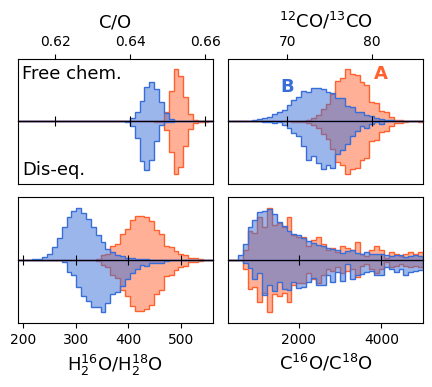

In [7]:
hist_kwargs_A = dict(
    #bins=25, histtype='stepfilled', fc=env_colors_m_A[1], ec=color_m_A, lw=2, bottom=0, density=True
    bins=40, histtype='stepfilled', fc=color_A, ec=color_A, lw=2, bottom=0, density=True,
)

hist_kwargs_B = hist_kwargs_A.copy()
hist_kwargs_B['fc'] = color_B
hist_kwargs_B['ec'] = color_B

hist_kwargs_A = dict(
    #bins=25, histtype='stepfilled', fc=env_colors_m_A[1], ec=color_m_A, lw=2, bottom=0, density=True
    bins=40, histtype='stepfilled', fc=env_colors_A[-1], ec=color_A, lw=lw_m, bottom=0, density=True
)

hist_kwargs_B = hist_kwargs_A.copy()
hist_kwargs_B['fc'] = env_colors_B[-1]
hist_kwargs_B['ec'] = color_B


hist_ranges = {
    'C/O': [0.610, 0.662], '12CO/13CO': [63,86], 'H2(16)O/H2(18)O': [190,560], 'C16O/C18O': [300,5000], 
}

fig = plt.figure(figsize=(4.5,4))
gs = fig.add_gridspec(
    nrows=5, ncols=2, hspace=0., wspace=0.08, height_ratios=[1,1,0.2,1,1],
    # nrows=5, ncols=2, hspace=0., wspace=0.08, height_ratios=[1.3,0.7,0.2,1.3,0.7],
)
ax_1 = [fig.add_subplot(gs[0,0]), fig.add_subplot(gs[0,1])]
ax_2 = [fig.add_subplot(gs[1,0]), fig.add_subplot(gs[1,1])]
ax_2 += [fig.add_subplot(gs[4,0]), fig.add_subplot(gs[4,1])]
ax_1 += [fig.add_subplot(gs[3,0]), fig.add_subplot(gs[3,1])]
ax_1 = np.array(ax_1)
ax_2 = np.array(ax_2)

for i, key in enumerate(hist_ranges.keys()):
    hist_range = hist_ranges[key]

    handle_A = ax_1[i].hist(chem_ratios_A[key], label='A', range=hist_range, **hist_kwargs_A)
    handle_B = ax_1[i].hist(chem_ratios_B[key], label='B', range=hist_range, **hist_kwargs_B)

    ax_2[i].hist(chem_ratios_A_eq[key], range=hist_range, **hist_kwargs_A)
    ax_2[i].hist(chem_ratios_B_eq[key], range=hist_range, **hist_kwargs_B)

    ylim = ax_1[i].get_ylim()
    ylim = [ylim[0], ylim[1]*1.15]
    ax_1[i].set(xlim=hist_range, yticks=[], ylim=ylim, facecolor='none')

    ylim = ax_2[i].get_ylim()
    ylim = [ylim[0], ylim[1]*1.15]
    ax_2[i].set(xlim=hist_range, yticks=[], ylim=ylim, facecolor='none')
    ax_2[i].yaxis.set_inverted(True)

ax_1[0].tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax_1[1].tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
ax_2[0].tick_params(axis='x', top=True, labeltop=False, bottom=False, labelbottom=False, direction='inout', length=7)
ax_2[1].tick_params(axis='x', top=True, labeltop=False, bottom=False, labelbottom=False, direction='inout', length=7)

ax_1[2].tick_params(axis='x', labelbottom=False, direction='inout', length=7)
ax_1[3].tick_params(axis='x', labelbottom=False, direction='inout', length=7)


# ax_1[0].set_xlabel(r'$\mathbf{\bf C/O}$', fontsize=13, labelpad=6.0)
# ax_1[1].set_xlabel(r'$\mathbf{\bf ^{12}CO/^{13}CO}$', fontsize=13, labelpad=6.0)
# ax_2[2].set_xlabel(r'$\mathbf{\bf C^{16}O/C^{18}O}$', fontsize=13)
# ax_2[3].set_xlabel(r'$\mathbf{\bf H_2^{16}O/H_2^{18}O}$', fontsize=13)

ax_1[0].set_xlabel(r'$\mathrm{C/O}$', fontsize=13, labelpad=6.0)
ax_1[1].set_xlabel(r'$\mathrm{^{12}CO/^{13}CO}$', fontsize=13, labelpad=6.0)
ax_2[2].set_xlabel(r'$\mathrm{H_2^{16}O/H_2^{18}O}$', fontsize=13)
ax_2[3].set_xlabel(r'$\mathrm{C^{16}O/C^{18}O}$', fontsize=13)

ax_1[0].xaxis.set_label_position('top')
ax_1[1].xaxis.set_label_position('top')

# ax_1[0].set_ylabel('Free', fontsize=13)
# ax_2[0].set_ylabel('Dis-eq.', fontsize=13)
ax_1[0].annotate('Free chem.', xy=(0.02,0.91), xycoords='axes fraction', ha='left', va='top', fontsize=13, color='k', )#zorder=-1)
ax_2[0].annotate('Dis-eq.', xy=(0.02,0.09), xycoords='axes fraction', ha='left', va='bottom', fontsize=13, color='k', )#zorder=-1)

# ax_1[1].legend(
#     loc='upper right', bbox_to_anchor=(1.,1.), bbox_transform=ax_1[1].transAxes, 
#     markerfirst=False, 
#     labelspacing=0.05, handlelength=1.0, handleheight=0.5, handletextpad=0.5, borderpad=0., 
#     labelcolor=[color_A, color_B], prop={'weight':'bold', 'size':13}, frameon=False, 
# )
ax_1[1].annotate('A', xy=(81,0.91), xycoords=ax_1[1].get_xaxis_transform(), ha='center', va='top', fontsize=13, color=color_A, weight='bold')
ax_1[1].annotate('B', xy=(70,0.7), xycoords=ax_1[1].get_xaxis_transform(), ha='center', va='top', fontsize=13, color=color_B, weight='bold')

plt.subplots_adjust(left=0.05, bottom=0.17, top=0.83, right=0.95)
plt.savefig(f'./plots/K_band_chem_ratios_new.pdf')
plt.show()

In [5]:
result_utils.latex_format(chem_ratios_A['C/O'], chem_ratios_B['C/O'], decimals=3)
result_utils.latex_format(chem_ratios_A['12CO/13CO'], chem_ratios_B['12CO/13CO'], decimals=0)

$0.653^{+0.002}_{-0.002}$ & $0.646^{+0.002}_{-0.002}$ \\
$78^{+2}_{-2}$ & $74^{+3}_{-3}$ \\


In [8]:
def get_log_g_posterior(Res):
    # Load the ParamTable module
    Res.load_components(['ParamTable'])
    
    # Get the indices of the free parameters
    idx_free = Res.ParamTable.get('log_g', key='idx_free')
    return Res.posterior[:,idx_free]

log_g_A = get_log_g_posterior(A)
log_g_B = get_log_g_posterior(B)
log_g_A_eq = get_log_g_posterior(A_eq)
log_g_B_eq = get_log_g_posterior(B_eq)

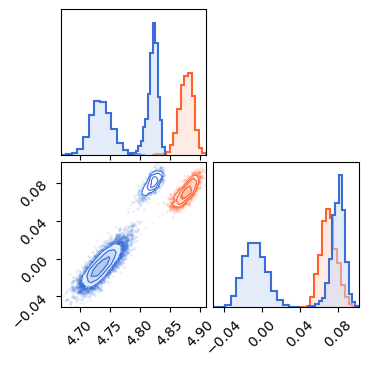

In [ ]:
corner_kwargs = dict(
    bins=15, 
    #range=posterior_ranges, 
    
    fill_contours=True, 
    plot_datapoints=True, 
    
    #labels=labels, 
    #show_titles=True, 
    use_math_text=True, 
    title_fmt='.2f', 
    title_kwargs={'fontsize':10},#, 'loc':'left', 'x':0.05}, 
    #labelpad=0.03, 
    labelpad=-0.03, 
    
    #smooth=True, 
)
fig = plt.figure(figsize=(4,4))

corner_kwargs['color'] = color_A
corner_kwargs['hist_kwargs'] = {
    'edgecolor':color_A, 'facecolor':env_colors_A[1], 'fill':True, 'density':True, 'lw':1.5, 
    }
corner_kwargs['contourf_kwargs'] = {'colors':env_colors_A}
corner_kwargs['contour_kwargs']  = {'linewidths':0.8, 'colors':color_A}
fig = corner.corner(
    fig=fig, data=np.array([log_g_A, abs_abund_A['(C+O)/H']]).T, **corner_kwargs,
    # range=[(4.65,4.95),(-0.05,0.15),(-0.05,0.15),(-0.05,0.15)],
    )
# corner_kwargs['hist_kwargs']['fill'] = False
# fig = corner.corner(
#     fig=fig, data=np.array([log_g_A_eq, abs_abund_A_eq['(C+O)/H']]).T, **corner_kwargs,
#     # range=[(4.65,4.95),(-0.05,0.15),(-0.05,0.15),(-0.05,0.15)],
#     )

corner_kwargs['color'] = color_B
corner_kwargs['hist_kwargs'] = {
    'edgecolor':color_B, 'facecolor':env_colors_B[1], 'fill':True, 'density':True, 'lw':1.5, 
    }
corner_kwargs['contourf_kwargs'] = {'colors':env_colors_B}
corner_kwargs['contour_kwargs']  = {'linewidths':0.8, 'colors':color_B}
fig = corner.corner(
    fig=fig, data=np.array([log_g_B, abs_abund_B['(C+O)/H']]).T, **corner_kwargs,
    #range=[(4.65,4.95),(-0.05,0.12),(-0.05,0.12),(-0.05,0.12)],
    )

# corner_kwargs['contourf_kwargs'] = {'colors':env_colors_B*np.array([1,1,1,0.])}
# fig = corner.corner(
#     fig=fig, data=np.array([log_g_B_eq, abs_abund_B_eq['(C+O)/H']]).T, **corner_kwargs,
#     )
plt.show()

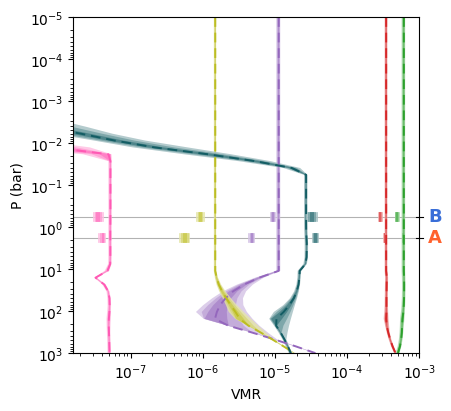

In [11]:
def plot_envelopes(ax, y, x, x_indices=[[0,6],[1,5],[2,4]], fc=[], median_kwargs={}, **fill_betweenx_kwargs):
    
    patch = None
    for i, (idx_l, idx_u) in enumerate(x_indices):
        patch = ax.fill_betweenx(
            y=y, x1=x[idx_l], x2=x[idx_u], fc=fc[i], **fill_betweenx_kwargs
            )
    
    line = None
    if len(median_kwargs) > 0:
        idx_m = median_kwargs.get('idx', 3)
        median_kwargs.pop('idx', None)

        line, = ax.plot(x[idx_m], y, **median_kwargs)
    
    return (line, patch, line)

def plot_VMR_envelope(ax, Chem, species, median_kwargs={}, **fill_betweenx_kwargs):

    VMR_q = result_utils.profile_quantiles(Chem.VMRs_posterior[species])
    plot_envelopes(
        ax, Chem.pressure, VMR_q, median_kwargs=median_kwargs, **fill_betweenx_kwargs, 
        )

def plot_VMR_errorbar(ax, Chem, species, y=1, x_indices=[[0,6],[1,5],[2,4]], **errorbar_kwargs):
    
    VMR_q = result_utils.profile_quantiles(Chem.VMRs_posterior[species])
    VMR_q = np.median(VMR_q, axis=-1)
    
    x = VMR_q[3]
    xerr = np.array([VMR_q[x_indices[i]] for i in range(len(x_indices))])
    xerr = np.abs(xerr-x).T

    x = np.repeat(x, len(x_indices))
    y = np.repeat(y, len(x_indices))
    ax.errorbar(x, y, xerr=xerr, **errorbar_kwargs)
    

species_info = {
    '12CO': ('C2'), 
    'H2O': ('C3'),
    'CH4': ('C4'),
    'NH3': ('C8'),
    'H2S': ('#135D64'),
    'HF': ('#FF59B4'),
}
y_A = 10**(+0.25)
y_B = 10**(-0.25)

fig, ax = plt.subplots(figsize=(4.5,4))
for species, (c) in species_info.items():

    #fc = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c])([0.4,0.6,0.8])
    fc = mpl.colors.LinearSegmentedColormap.from_list('', ['w',c])([0.4,0.6,0.8])
    # fc[:,3] = np.array([0.4,0.6,0.8])

    plot_VMR_errorbar(
        ax, A.Chem['K2166_1'], species, y=y_A, **dict(ecolor=fc, elinewidth=7, ls='', alpha=0.8)
        )
    # plot_VMR_envelope(
    #     ax, A_eq.Chem['K2166_1'], species, median_kwargs=dict(c=c, lw=1.4, ls='-'), 
    #     **dict(fc=fc, ec='none', alpha=0.8)
    #     )

    plot_VMR_errorbar(
        ax, B.Chem['K2166_1'], species, y=y_B, **dict(ecolor=fc, elinewidth=7, ls='', alpha=0.8)
        )
    plot_VMR_envelope(
        ax, B_eq.Chem['K2166_1'], species, median_kwargs=dict(c=c, lw=1.4, ls=(0,(5,3))), 
        **dict(fc=fc, ec='none', alpha=0.8)
        )

ax.plot([0.,1.0], [y_A]*2, transform=ax.get_yaxis_transform(), lw=0.8, c='k', alpha=0.3, zorder=-1)
ax.plot([0.,1.0], [y_B]*2, transform=ax.get_yaxis_transform(), lw=0.8, c='k', alpha=0.3, zorder=-1)

ax.plot([0.99,1.01], [y_A]*2, transform=ax.get_yaxis_transform(), lw=0.8, c='k', clip_on=False)
ax.plot([0.99,1.01], [y_B]*2, transform=ax.get_yaxis_transform(), lw=0.8, c='k', clip_on=False)

ax.annotate('A', xy=(1.025,y_A), xycoords=ax.get_yaxis_transform(), ha='left', va='center', fontsize=13, color=color_A, weight='bold')
ax.annotate('B', xy=(1.025,y_B), xycoords=ax.get_yaxis_transform(), ha='left', va='center', fontsize=13, color=color_B, weight='bold')

ax.set(
    xscale='log', xlim=(10**(-7.8), 1e-3), xlabel='VMR', 
    yscale='log', ylim=(1e3, 1e-5), ylabel='P (bar)', 
    )
plt.subplots_adjust(left=0.16, bottom=0.12, top=0.96, right=0.93)
plt.savefig('./plots/K_band_VMR_profiles.pdf')
plt.show()